# Data Aggregation

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
Vegas = pd.read_csv('vegas.csv')
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()
Vegas.columns

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_51161/3650027749.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()


Index(['user_country', 'nr_reviews', 'nr_hotel_reviews', 'helpful_votes',
       'score', 'period_of_stay', 'traveler_type', 'pool', 'gym',
       'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_name',
       'hotel_stars', 'nr_rooms', 'user_continent', 'member_years',
       'review_month', 'review_weekday'],
      dtype='object')

### just for copy to next notebook

In [ ]:
# import numpy as np
# import pandas as pd
# pd.options.display.float_format = '{:,.2f}'.format
# import matplotlib.pyplot as plt
# %matplotlib inline
# Vegas = pd.read_csv('vegas.csv')
# Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.lower()
# Vegas.columns

---

In [5]:
# specifically for GROUPING

# aggregation -- any operation that transforms an array into a scalar value

In [6]:
# apply mean

In [7]:
# other aggregation operationds


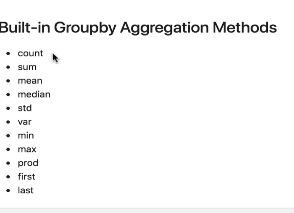

In [8]:
# these will all ignore NA values

In [10]:
Vegas.head(2)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   

  period_of_stay traveler_type pool  gym tennis_court spa casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   

  free_internet                              hotel_name hotel_stars  nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  user_continent  member_years review_month review_weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday

In [11]:
by_hotel = Vegas.groupby('hotel_name')

In [23]:
by_hotel

# is a dataframe

In [27]:
by_hotel.head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0            USA          11                 4             13      5   
1            USA         119                21             75      3   
2            USA          36                 9             25      5   
3             UK          14                 7             14      4   
4         Canada           5                 5              2      4   
..           ...         ...               ...            ...    ...   
480       Canada          20                13             17      4   
481          USA          15                 3              4      3   
482        Italy         189                72            129      4   
483          USA          25                19             27      3   
484          USA          33                11             12      5   

    period_of_stay traveler_type pool  gym tennis_court  spa casino  \
0          Dec-Feb       Friends   NO  YES           NO   NO    YES   
1          Dec-Feb      Business   NO  YES           NO   NO    YES   
2          Mar-May      Families   NO  YES           NO   NO    YES   
3          Mar-May       Friends   NO  YES           NO   NO    YES   
4          Mar-May          Solo   NO  YES           NO   NO    YES   
..             ...           ...  ...  ...          ...  ...    ...   
480        Dec-Feb       Couples  YES  YES           NO  YES    YES   
481        Dec-Feb      Families  YES  YES           NO  YES    YES   
482        Dec-Feb          Solo  YES  YES           NO  YES    YES   
483        Dec-Feb       Couples  YES  YES           NO  YES    YES   
484        Mar-May      Business  YES  YES           NO  YES    YES   

    free_internet                               hotel_name hotel_stars  \
0             YES   Circus Circus Hotel & Casino Las Vegas           3   
1             YES   Circus Circus Hotel & Casino Las Vegas           3   
2             YES   Circus Circus Hotel & Casino Las Vegas           3   
3             YES   Circus Circus Hotel & Casino Las Vegas           3   
4             YES   Circus Circus Hotel & Casino Las Vegas           3   
..            ...                                      ...         ...   
480           YES  The Westin las Vegas Hotel Casino & Spa           4   
481           YES  The Westin las Vegas Hotel Casino & Spa           4   
482           YES  The Westin las Vegas Hotel Casino & Spa           4   
483           YES  The Westin las Vegas Hotel Casino & Spa           4   
484           YES  The Westin las Vegas Hotel Casino & Spa           4   

     nr_rooms user_continent  member_years review_month review_weekday  
0        3773  North America             9      January       Thursday  
1        3773  North America             3      January         Friday  
2        3773  North America             2     February       Saturday  
3        3773         Europe             6     February         Friday  
4        3773  North America             7        March        Tuesday  
..        ...            ...           ...          ...            ...  
480       826  North America             4      January         Monday  
481       826  North America             7      January        Tuesday  
482       826         Europe             3     February         Friday  
483       826  North America             8     February         Monday  
484       826  North America             4        March      Wednesday  

[105 rows x 20 columns]

In [16]:
by_hotel['score'].quantile(.5)

# get the 50th percentile (using quantile)

hotel_name
Bellagio Las Vegas                                    4.50
Caesars Palace                                        4.50
Circus Circus Hotel & Casino Las Vegas                3.00
Encore at wynn Las Vegas                              5.00
Excalibur Hotel & Casino                              4.00
Hilton Grand Vacations at the Flamingo                4.00
Hilton Grand Vacations on the Boulevard               4.50
Marriott's Grand Chateau                              5.00
Monte Carlo Resort&Casino                             3.50
Paris Las Vegas                                       4.00
The Cosmopolitan Las Vegas                            5.00
The Cromwell                                          4.50
The Palazzo Resort Hotel Casino                       5.00
The Venetian Las Vegas Hotel                          5.00
The Westin las Vegas Hotel Casino & Spa               4.00
Treasure Island- TI Hotel & Casino                    4.00
Tropicana Las Vegas - A Double Tree by Hilton

In [17]:
# quantile isn't exactly with the group by

# but is a Pandas Series function -- which is now applied to the group by

---

# Writing own aggregation functions (with groupby)

In [18]:
# takes in a series and returns a single scalar value

# you pass the function into the agg method

## e.g. calculate range(max-min) score

In [19]:
# the parameter pdseries is a pd series

def my_range(pdseries):
    return np.max(pdseries) - np.min(pdseries)

In [20]:
# apply this to a pd series

In [22]:
by_hotel

# this is a dataframe

In [28]:
# you can apply this to a dataframe as well (but not recommended or necessary)

In [29]:
by_hotel.agg(my_range)

/var/folders/xj/j51mz36s00z2vnfq7wp23hxm0000gn/T/ipykernel_51161/828372873.py:1: FutureWarning: ['user_country', 'period_of_stay', 'traveler_type', 'pool', 'gym', 'tennis_court', 'spa', 'casino', 'free_internet', 'hotel_stars', 'user_continent', 'review_month', 'review_weekday'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  by_hotel.agg(my_range)


nr_reviews  \
hotel_name                                                       
Bellagio Las Vegas                                          99   
Caesars Palace                                             157   
Circus Circus Hotel & Casino Las Vegas                     144   
Encore at wynn Las Vegas                                   330   
Excalibur Hotel & Casino                                   287   
Hilton Grand Vacations at the Flamingo                     288   
Hilton Grand Vacations on the Boulevard                    108   
Marriott's Grand Chateau                                   366   
Monte Carlo Resort&Casino                                  575   
Paris Las Vegas                                            133   
The Cosmopolitan Las Vegas                                 124   
The Cromwell                                               318   
The Palazzo Resort Hotel Casino                            248   
The Venetian Las Vegas Hotel                               115   
The Westin las Vegas Hotel Casino & Spa                    180   
Treasure Island- TI Hotel & Casino                          93   
Tropicana Las Vegas - A Double Tree by Hilton H...         125   
Trump International Hotel Las Vegas                        774   
Tuscany Las Vegas Suites & Casino                          607   
Wyndham Grand Desert                                       409   
Wynn Las Vegas                                             162   

                                                    nr_hotel_reviews  \
hotel_name                                                             
Bellagio Las Vegas                                                35   
Caesars Palace                                                    53   
Circus Circus Hotel & Casino Las Vegas                            23   
Encore at wynn Las Vegas                                          55   
Excalibur Hotel & Casino                                         263   
Hilton Grand Vacations at the Flamingo                           262   
Hilton Grand Vacations on the Boulevard                           49   
Marriott's Grand Chateau                                         107   
Monte Carlo Resort&Casino                                        126   
Paris Las Vegas                                                   39   
The Cosmopolitan Las Vegas                                        37   
The Cromwell                                                     111   
The Palazzo Resort Hotel Casino                                   55   
The Venetian Las Vegas Hotel                                      78   
The Westin las Vegas Hotel Casino & Spa                           69   
Treasure Island- TI Hotel & Casino                                31   
Tropicana Las Vegas - A Double Tree by Hilton H...                78   
Trump International Hotel Las Vegas                               58   
Tuscany Las Vegas Suites & Casino                                117   
Wyndham Grand Desert                                             159   
Wynn Las Vegas                                                    45   

                                                    helpful_votes  score  \
hotel_name                                                                 
Bellagio Las Vegas                                            110      3   
Caesars Palace                                                 83      4   
Circus Circus Hotel & Casino Las Vegas                         75      4   
Encore at wynn Las Vegas                                      199      4   
Excalibur Hotel & Casino                                      297      3   
Hilton Grand Vacations at the Flamingo                        299      3   
Hilton Grand Vacations on the Boulevard                        57      4   
Marriott's Grand Chateau                                      334      2   
Monte Carlo Resort&Casino                                     338      4   
Paris Las Vegas                         

#### apply to a pd series

In [30]:
pdseries = by_hotel['score']

In [31]:
pdseries

In [32]:
pdseries.agg(my_range)

hotel_name
Bellagio Las Vegas                                     3
Caesars Palace                                         4
Circus Circus Hotel & Casino Las Vegas                 4
Encore at wynn Las Vegas                               4
Excalibur Hotel & Casino                               3
Hilton Grand Vacations at the Flamingo                 3
Hilton Grand Vacations on the Boulevard                4
Marriott's Grand Chateau                               2
Monte Carlo Resort&Casino                              4
Paris Las Vegas                                        3
The Cosmopolitan Las Vegas                             4
The Cromwell                                           4
The Palazzo Resort Hotel Casino                        2
The Venetian Las Vegas Hotel                           2
The Westin las Vegas Hotel Casino & Spa                3
Treasure Island- TI Hotel & Casino                     2
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4
Trump International 

---

In [34]:
# group operations tend to be very expensive

# as it requires data to be moved around

# or maintain an extra set of references

#### use the built in methods whenever possible

#### user defined methods are quite expensive
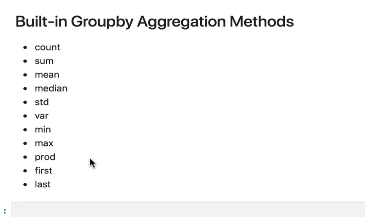


### use non-aggregation methods on the pd series

In [35]:
Vegas.score.groupby(Vegas.pool)

In [36]:
Vegas.score.groupby(Vegas.pool).sum()

pool
NO       77
YES    2001
Name: score, dtype: int64

In [37]:
# now use the describe method, which is not in the list of built in aggregation functinos

In [38]:
Vegas.score.groupby(Vegas.pool).describe()

count  mean  std  min  25%  50%  75%  max
pool                                           
NO    24.00  3.21 1.10 1.00 2.75 3.00 4.00 5.00
YES  480.00  4.17 0.98 1.00 4.00 4.00 5.00 5.00

----

In [39]:
# value counts

# antherexample of an non-agg method

In [40]:
Vegas.score.groupby(Vegas.pool).value_counts()

pool  score
NO    4          9
      3          7
      2          4
      1          2
      5          2
YES   5        225
      4        155
      3         65
      2         26
      1          9
Name: score, dtype: int64

In [42]:
# unstack

Vegas.score.groupby(Vegas.pool).value_counts().unstack()

score  1   2   3    4    5
pool                      
NO     2   4   7    9    2
YES    9  26  65  155  225

#### these are more general examples of the SPLIT-APPLY-COMBINE approach

---

# Aggregate with MULTIPLE FUNCTIONS

In [46]:
by_hotel.head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0            USA          11                 4             13      5   
1            USA         119                21             75      3   
2            USA          36                 9             25      5   
3             UK          14                 7             14      4   
4         Canada           5                 5              2      4   
..           ...         ...               ...            ...    ...   
480       Canada          20                13             17      4   
481          USA          15                 3              4      3   
482        Italy         189                72            129      4   
483          USA          25                19             27      3   
484          USA          33                11             12      5   

    period_of_stay traveler_type pool  gym tennis_court  spa casino  \
0          Dec-Feb       Friends   NO  YES           NO   NO    YES   
1          Dec-Feb      Business   NO  YES           NO   NO    YES   
2          Mar-May      Families   NO  YES           NO   NO    YES   
3          Mar-May       Friends   NO  YES           NO   NO    YES   
4          Mar-May          Solo   NO  YES           NO   NO    YES   
..             ...           ...  ...  ...          ...  ...    ...   
480        Dec-Feb       Couples  YES  YES           NO  YES    YES   
481        Dec-Feb      Families  YES  YES           NO  YES    YES   
482        Dec-Feb          Solo  YES  YES           NO  YES    YES   
483        Dec-Feb       Couples  YES  YES           NO  YES    YES   
484        Mar-May      Business  YES  YES           NO  YES    YES   

    free_internet                               hotel_name hotel_stars  \
0             YES   Circus Circus Hotel & Casino Las Vegas           3   
1             YES   Circus Circus Hotel & Casino Las Vegas           3   
2             YES   Circus Circus Hotel & Casino Las Vegas           3   
3             YES   Circus Circus Hotel & Casino Las Vegas           3   
4             YES   Circus Circus Hotel & Casino Las Vegas           3   
..            ...                                      ...         ...   
480           YES  The Westin las Vegas Hotel Casino & Spa           4   
481           YES  The Westin las Vegas Hotel Casino & Spa           4   
482           YES  The Westin las Vegas Hotel Casino & Spa           4   
483           YES  The Westin las Vegas Hotel Casino & Spa           4   
484           YES  The Westin las Vegas Hotel Casino & Spa           4   

     nr_rooms user_continent  member_years review_month review_weekday  
0        3773  North America             9      January       Thursday  
1        3773  North America             3      January         Friday  
2        3773  North America             2     February       Saturday  
3        3773         Europe             6     February         Friday  
4        3773  North America             7        March        Tuesday  
..        ...            ...           ...          ...            ...  
480       826  North America             4      January         Monday  
481       826  North America             7      January        Tuesday  
482       826         Europe             3     February         Friday  
483       826  North America             8     February         Monday  
484       826  North America             4        March      Wednesday  

[105 rows x 20 columns]

In [49]:
type(by_hotel)

pandas.core.groupby.generic.DataFrameGroupBy

In [52]:
by_hotel.info()

AttributeError: 'DataFrameGroupBy' object has no attribute 'info'

In [53]:
# interesting

# this is a DATAGRAME-GROUPBY object -- not a simply DATAFRAME object


In [55]:
by_hotel['score'].head()

0      5
1      3
2      5
3      4
4      4
      ..
480    4
481    3
482    4
483    3
484    5
Name: score, Length: 105, dtype: int64

In [58]:
by_hotel['score'].mean()

hotel_name
Bellagio Las Vegas                                    4.21
Caesars Palace                                        4.12
Circus Circus Hotel & Casino Las Vegas                3.21
Encore at wynn Las Vegas                              4.54
Excalibur Hotel & Casino                              3.71
Hilton Grand Vacations at the Flamingo                3.96
Hilton Grand Vacations on the Boulevard               4.17
Marriott's Grand Chateau                              4.54
Monte Carlo Resort&Casino                             3.29
Paris Las Vegas                                       4.04
The Cosmopolitan Las Vegas                            4.25
The Cromwell                                          4.08
The Palazzo Resort Hotel Casino                       4.38
The Venetian Las Vegas Hotel                          4.58
The Westin las Vegas Hotel Casino & Spa               3.92
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton

In [59]:
by_hotel['score'].agg(['mean', my_range])

mean  my_range
hotel_name                                                        
Bellagio Las Vegas                                  4.21         3
Caesars Palace                                      4.12         4
Circus Circus Hotel & Casino Las Vegas              3.21         4
Encore at wynn Las Vegas                            4.54         4
Excalibur Hotel & Casino                            3.71         3
Hilton Grand Vacations at the Flamingo              3.96         3
Hilton Grand Vacations on the Boulevard             4.17         4
Marriott's Grand Chateau                            4.54         2
Monte Carlo Resort&Casino                           3.29         4
Paris Las Vegas                                     4.04         3
The Cosmopolitan Las Vegas                          4.25         4
The Cromwell                                        4.08         4
The Palazzo Resort Hotel Casino                     4.38         2
The Venetian Las Vegas Hotel                        4.58         2
The Westin las Vegas Hotel Casino & Spa             3.92         3
Treasure Island- TI Hotel & Casino                  3.96         2
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04         4
Trump International Hotel Las Vegas                 4.38         4
Tuscany Las Vegas Suites & Casino                   4.21         3
Wyndham Grand Desert                                4.38         2
Wynn Las Vegas                                      4.62         3

In [60]:
# check if mean of x is greater than 4 (using lamnda)

by_hotel['score'].agg(['mean', my_range, lambda x : x.mean() > 4])

mean  my_range  <lambda_0>
hotel_name                                                                    
Bellagio Las Vegas                                  4.21         3        True
Caesars Palace                                      4.12         4        True
Circus Circus Hotel & Casino Las Vegas              3.21         4       False
Encore at wynn Las Vegas                            4.54         4        True
Excalibur Hotel & Casino                            3.71         3       False
Hilton Grand Vacations at the Flamingo              3.96         3       False
Hilton Grand Vacations on the Boulevard             4.17         4        True
Marriott's Grand Chateau                            4.54         2        True
Monte Carlo Resort&Casino                           3.29         4       False
Paris Las Vegas                                     4.04         3        True
The Cosmopolitan Las Vegas                          4.25         4        True
The Cromwell                                        4.08         4        True
The Palazzo Resort Hotel Casino                     4.38         2        True
The Venetian Las Vegas Hotel                        4.58         2        True
The Westin las Vegas Hotel Casino & Spa             3.92         3       False
Treasure Island- TI Hotel & Casino                  3.96         2       False
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04         4        True
Trump International Hotel Las Vegas                 4.38         4        True
Tuscany Las Vegas Suites & Casino                   4.21         3        True
Wyndham Grand Desert                                4.38         2        True
Wynn Las Vegas                                      4.62         3        True

#### you get a new df and each function becomes a column in the new dataframe

In [63]:
# name the lamdba column

by_hotel['score'].agg(['mean', my_range, ('4+score', lambda x : x.mean() > 4)])

mean  \
hotel_name                                                 
Bellagio Las Vegas                                  4.21   
Caesars Palace                                      4.12   
Circus Circus Hotel & Casino Las Vegas              3.21   
Encore at wynn Las Vegas                            4.54   
Excalibur Hotel & Casino                            3.71   
Hilton Grand Vacations at the Flamingo              3.96   
Hilton Grand Vacations on the Boulevard             4.17   
Marriott's Grand Chateau                            4.54   
Monte Carlo Resort&Casino                           3.29   
Paris Las Vegas                                     4.04   
The Cosmopolitan Las Vegas                          4.25   
The Cromwell                                        4.08   
The Palazzo Resort Hotel Casino                     4.38   
The Venetian Las Vegas Hotel                        4.58   
The Westin las Vegas Hotel Casino & Spa             3.92   
Treasure Island- TI Hotel & Casino                  3.96   
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04   
Trump International Hotel Las Vegas                 4.38   
Tuscany Las Vegas Suites & Casino                   4.21   
Wyndham Grand Desert                                4.38   
Wynn Las Vegas                                      4.62   

                                                    <function my_range at 0x7fa77813d820>  \
hotel_name                                                                                  
Bellagio Las Vegas                                                                      3   
Caesars Palace                                                                          4   
Circus Circus Hotel & Casino Las Vegas                                                  4   
Encore at wynn Las Vegas                                                                4   
Excalibur Hotel & Casino                                                                3   
Hilton Grand Vacations at the Flamingo                                                  3   
Hilton Grand Vacations on the Boulevard                                                 4   
Marriott's Grand Chateau                                                                2   
Monte Carlo Resort&Casino                                                               4   
Paris Las Vegas                                                                         3   
The Cosmopolitan Las Vegas                                                              4   
The Cromwell                                                                            4   
The Palazzo Resort Hotel Casino                                                         2   
The Venetian Las Vegas Hotel                                                            2   
The Westin las Vegas Hotel Casino & Spa                                                 3   
Treasure Island- TI Hotel & Casino                                                      2   
Tropicana Las Vegas - A Double Tree by Hilton H...                                      4   
Trump International Hotel Las Vegas                                                     4   
Tuscany Las Vegas Suites & Casino                                                       3   
Wyndham Grand Desert                                                                    2   
Wynn Las Vegas                                                                          3   

                                                    4+score  
hotel_name                                                   
Bellagio Las Vegas                                     True  
Caesars Palace                                         True  
Circus Circus Hotel & Casino Las Vegas                False  
Encore at wynn Las Vegas                               True  
Excalibur Hotel & Casino                              False  
Hilton Grand Vacations at the Flamingo                False  
Hilton Grand Vacations on the Boule

In [64]:
# name the rangen functino

by_hotel['score'].agg(['mean', ('range', my_range), ('4+score', lambda x : x.mean() > 4)])

mean  range  4+score
hotel_name                                                              
Bellagio Las Vegas                                  4.21      3     True
Caesars Palace                                      4.12      4     True
Circus Circus Hotel & Casino Las Vegas              3.21      4    False
Encore at wynn Las Vegas                            4.54      4     True
Excalibur Hotel & Casino                            3.71      3    False
Hilton Grand Vacations at the Flamingo              3.96      3    False
Hilton Grand Vacations on the Boulevard             4.17      4     True
Marriott's Grand Chateau                            4.54      2     True
Monte Carlo Resort&Casino                           3.29      4    False
Paris Las Vegas                                     4.04      3     True
The Cosmopolitan Las Vegas                          4.25      4     True
The Cromwell                                        4.08      4     True
The Palazzo Resort Hotel Casino                     4.38      2     True
The Venetian Las Vegas Hotel                        4.58      2     True
The Westin las Vegas Hotel Casino & Spa             3.92      3    False
Treasure Island- TI Hotel & Casino                  3.96      2    False
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04      4     True
Trump International Hotel Las Vegas                 4.38      4     True
Tuscany Las Vegas Suites & Casino                   4.21      3     True
Wyndham Grand Desert                                4.38      2     True
Wynn Las Vegas                                      4.62      3     True

---

# apply multiple functions to multiple columns

In [74]:
# applt the two functions to two columns (score & member_years)

by_hotel[['score', 'member_years']].agg(['mean', my_range])

score           \
                                                    mean my_range   
hotel_name                                                          
Bellagio Las Vegas                                  4.21        3   
Caesars Palace                                      4.12        4   
Circus Circus Hotel & Casino Las Vegas              3.21        4   
Encore at wynn Las Vegas                            4.54        4   
Excalibur Hotel & Casino                            3.71        3   
Hilton Grand Vacations at the Flamingo              3.96        3   
Hilton Grand Vacations on the Boulevard             4.17        4   
Marriott's Grand Chateau                            4.54        2   
Monte Carlo Resort&Casino                           3.29        4   
Paris Las Vegas                                     4.04        3   
The Cosmopolitan Las Vegas                          4.25        4   
The Cromwell                                        4.08        4   
The Palazzo Resort Hotel Casino                     4.38        2   
The Venetian Las Vegas Hotel                        4.58        2   
The Westin las Vegas Hotel Casino & Spa             3.92        3   
Treasure Island- TI Hotel & Casino                  3.96        2   
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04        4   
Trump International Hotel Las Vegas                 4.38        4   
Tuscany Las Vegas Suites & Casino                   4.21        3   
Wyndham Grand Desert                                4.38        2   
Wynn Las Vegas                                      4.62        3   

                                                   member_years           
                                                           mean my_range  
hotel_name                                                                
Bellagio Las Vegas                                         3.42       10  
Caesars Palace                                             4.75       13  
Circus Circus Hotel & Casino Las Vegas                     3.83       10  
Encore at wynn Las Vegas                                   4.75        9  
Excalibur Hotel & Casino                                   4.50       11  
Hilton Grand Vacations at the Flamingo                     3.96       10  
Hilton Grand Vacations on the Boulevard                    4.79       10  
Marriott's Grand Chateau                                   4.38       10  
Monte Carlo Resort&Casino                                  3.58        9  
Paris Las Vegas                                            3.62        9  
The Cosmopolitan Las Vegas                                 4.50       10  
The Cromwell                                               3.58       11  
The Palazzo Resort Hotel Casino                            5.29       10  
The Venetian Las Vegas Hotel                               4.38       10  
The Westin las Vegas Hotel Casino & Spa                    5.75       11  
Treasure Island- TI Hotel & Casino                       -71.04     1818  
Tropicana Las Vegas - A Double Tree by Hilton H...         3.08       10  
Trump International Hotel Las Vegas                        4.33       11  
Tuscany Las Vegas Suites & Casino                          4.71        8  
Wyndham Grand Desert                                       4.54       10  
Wynn Las Vegas                                             5.42       10

In [68]:
# there wont be a need to apply the same function to every variable

In [69]:
Vegas.head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   
2          USA          36                 9             25      5   
3           UK          14                 7             14      4   
4       Canada           5                 5              2      4   

  period_of_stay traveler_type pool  gym tennis_court spa casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  free_internet                              hotel_name hotel_stars  nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  user_continent  member_years review_month review_weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday  
2  North America             2     February       Saturday  
3         Europe             6     February         Friday  
4  North America             7        March        Tuesday

### calculate the % of travelers that were not from the USA

#### pass a dictionary into the agg

In [78]:
func_dict = {'score': 'mean', 'user_country': lambda x : (x != 'USA').mean()}

In [76]:
type(func_dict)

dict

### create a new DF

In [79]:
hotel_df = by_hotel.agg(func_dict)

In [80]:
hotel_df

score  user_country
hotel_name                                                             
Bellagio Las Vegas                                   4.21          0.67
Caesars Palace                                       4.12          0.42
Circus Circus Hotel & Casino Las Vegas               3.21          0.58
Encore at wynn Las Vegas                             4.54          0.42
Excalibur Hotel & Casino                             3.71          0.75
Hilton Grand Vacations at the Flamingo               3.96          0.50
Hilton Grand Vacations on the Boulevard              4.17          0.58
Marriott's Grand Chateau                             4.54          0.67
Monte Carlo Resort&Casino                            3.29          0.75
Paris Las Vegas                                      4.04          0.38
The Cosmopolitan Las Vegas                           4.25          0.62
The Cromwell                                         4.08          0.38
The Palazzo Resort Hotel Casino                      4.38          0.58
The Venetian Las Vegas Hotel                         4.58          0.71
The Westin las Vegas Hotel Casino & Spa              3.92          0.29
Treasure Island- TI Hotel & Casino                   3.96          0.75
Tropicana Las Vegas - A Double Tree by Hilton H...   4.04          0.92
Trump International Hotel Las Vegas                  4.38          0.54
Tuscany Las Vegas Suites & Casino                    4.21          0.46
Wyndham Grand Desert                                 4.38          0.50
Wynn Las Vegas                                       4.62          0.50

In [81]:
# you will now see the mean score applied to the 'score' column

# and the % non-US travelers function applied to the user_country column

---

In [82]:
# determine if each hotel has a pool

In [83]:
# aggreating the pool variable (should hav eonly one value for any given hotel)

In [86]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas').head(5)

user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   
2          USA          36                 9             25      5   
3           UK          14                 7             14      4   
4       Canada           5                 5              2      4   

  period_of_stay traveler_type pool  gym tennis_court spa casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  free_internet                              hotel_name hotel_stars  nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  user_continent  member_years review_month review_weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday  
2  North America             2     February       Saturday  
3         Europe             6     February         Friday  
4  North America             7        March        Tuesday

In [87]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')['pool']

0     NO
1     NO
2     NO
3     NO
4     NO
5     NO
6     NO
7     NO
8     NO
9     NO
10    NO
11    NO
12    NO
13    NO
14    NO
15    NO
16    NO
17    NO
18    NO
19    NO
20    NO
21    NO
22    NO
23    NO
Name: pool, dtype: object

In [88]:
# need some aggregation function taht returns a SINGLE value from this series

# maybe the first element of the series

In [89]:
# use the first method

In [90]:
# FIRST IS A GROUPBY METHOD -- not a SERIES METHOD

In [91]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')['pool'].first()

TypeError: first() missing 1 required positional argument: 'offset'

In [93]:
by_hotel['pool']

# notince this is a group by Series

In [94]:
by_hotel['pool'].first()

hotel_name
Bellagio Las Vegas                                     YES
Caesars Palace                                         YES
Circus Circus Hotel & Casino Las Vegas                  NO
Encore at wynn Las Vegas                               YES
Excalibur Hotel & Casino                               YES
Hilton Grand Vacations at the Flamingo                 YES
Hilton Grand Vacations on the Boulevard                YES
Marriott's Grand Chateau                               YES
Monte Carlo Resort&Casino                              YES
Paris Las Vegas                                        YES
The Cosmopolitan Las Vegas                             YES
The Cromwell                                           YES
The Palazzo Resort Hotel Casino                        YES
The Venetian Las Vegas Hotel                           YES
The Westin las Vegas Hotel Casino & Spa                YES
Treasure Island- TI Hotel & Casino                     YES
Tropicana Las Vegas - A Double Tree by Hilton

___

In [95]:
# we need to be sure there is indeed just one value

# for coding errors

# so, circus circus has only one value for pool

## USE CUSTOM AGGREGATION FUNCTION

### to see if there is just one unique value

In [97]:
def is_unique(gpseries):
    #gpseries.unique()
    return len(gpseries.unique()) ==1

In [99]:
by_hotel['pool'].agg(is_unique)

hotel_name
Bellagio Las Vegas                                     True
Caesars Palace                                         True
Circus Circus Hotel & Casino Las Vegas                 True
Encore at wynn Las Vegas                               True
Excalibur Hotel & Casino                               True
Hilton Grand Vacations at the Flamingo                 True
Hilton Grand Vacations on the Boulevard                True
Marriott's Grand Chateau                               True
Monte Carlo Resort&Casino                              True
Paris Las Vegas                                        True
The Cosmopolitan Las Vegas                             True
The Cromwell                                           True
The Palazzo Resort Hotel Casino                        True
The Venetian Las Vegas Hotel                           True
The Westin las Vegas Hotel Casino & Spa                True
Treasure Island- TI Hotel & Casino                     True
Tropicana Las Vegas - A Doubl

In [101]:
# check if there is consistency across all values

# this would help if there are 1000's or records (not just 20 like above)

by_hotel['pool'].agg(is_unique).all()

True

In [104]:
type(by_hotel)

pandas.core.groupby.generic.DataFrameGroupBy

In [103]:
by_hotel.agg(is_unique).all()

user_country        False
nr_reviews          False
nr_hotel_reviews    False
helpful_votes       False
score               False
period_of_stay      False
traveler_type       False
pool                 True
gym                  True
tennis_court         True
spa                  True
casino               True
free_internet        True
hotel_stars          True
nr_rooms             True
user_continent      False
member_years        False
review_month        False
review_weekday      False
dtype: bool

In [105]:
# pool, gym etc are all true -- whcih means there is a unique value for thise columns across the entier dataset

---

In [106]:
# add them back to the hotel data

In [107]:
# longer versin of the function_dict

In [110]:
func_dict = {'score': 'mean',
            'user_country': lambda x : (x != 'USA').mean(),
             'gym' : 'first',
             'tennis_court': 'first',
             'spa' : 'first',
             'casino' : 'first',
             'free_internet': 'first',
             'hotel_stars': 'first',
             'nr_rooms' : 'first'
            }

### save values in a new dataframe

In [118]:
hotel_df = by_hotel.agg(func_dict)

type(hotel_df)

pandas.core.frame.DataFrame

In [119]:
hotel_df

score  user_country  gym  \
hotel_name                                                                     
Bellagio Las Vegas                                   4.21          0.67  YES   
Caesars Palace                                       4.12          0.42  YES   
Circus Circus Hotel & Casino Las Vegas               3.21          0.58  YES   
Encore at wynn Las Vegas                             4.54          0.42  YES   
Excalibur Hotel & Casino                             3.71          0.75  YES   
Hilton Grand Vacations at the Flamingo               3.96          0.50  YES   
Hilton Grand Vacations on the Boulevard              4.17          0.58  YES   
Marriott's Grand Chateau                             4.54          0.67  YES   
Monte Carlo Resort&Casino                            3.29          0.75  YES   
Paris Las Vegas                                      4.04          0.38  YES   
The Cosmopolitan Las Vegas                           4.25          0.62  YES   
The Cromwell                                         4.08          0.38   NO   
The Palazzo Resort Hotel Casino                      4.38          0.58  YES   
The Venetian Las Vegas Hotel                         4.58          0.71  YES   
The Westin las Vegas Hotel Casino & Spa              3.92          0.29  YES   
Treasure Island- TI Hotel & Casino                   3.96          0.75  YES   
Tropicana Las Vegas - A Double Tree by Hilton H...   4.04          0.92  YES   
Trump International Hotel Las Vegas                  4.38          0.54  YES   
Tuscany Las Vegas Suites & Casino                    4.21          0.46  YES   
Wyndham Grand Desert                                 4.38          0.50  YES   
Wynn Las Vegas                                       4.62          0.50  YES   

                                                   tennis_court  spa casino  \
hotel_name                                                                    
Bellagio Las Vegas                                           NO  YES    YES   
Caesars Palace                                               NO  YES    YES   
Circus Circus Hotel & Casino Las Vegas                       NO   NO    YES   
Encore at wynn Las Vegas                                     NO  YES    YES   
Excalibur Hotel & Casino                                     NO  YES    YES   
Hilton Grand Vacations at the Flamingo                       NO   NO     NO   
Hilton Grand Vacations on the Boulevard                      NO  YES    YES   
Marriott's Grand Chateau                                     NO   NO    YES   
Monte Carlo Resort&Casino                                    NO  YES    YES   
Paris Las Vegas                                              NO  YES    YES   
The Cosmopolitan Las Vegas                                   NO  YES    YES   
The Cromwell                                                 NO   NO    YES   
The Palazzo Resort Hotel Casino                              NO  YES    YES   
The Venetian Las Vegas Hotel                                 NO  YES    YES   
The Westin las Vegas Hotel Casino & Spa                      NO  YES    YES   
Treasure Island- TI Hotel & Casino                          YES  YES    YES   
Tropicana Las Vegas - A Double Tree by Hilton H...          YES  YES    YES   
Trump International Hotel Las Vegas                          NO  YES    YES   
Tuscany Las Vegas Suites & Casino                           YES  YES    YES   
Wyndham Grand Desert                                        YES   NO     NO   
Wynn Las Vegas                                              YES  YES    YES   

                                                   free_internet hotel_stars  \
hotel_name                                                                     
Bellagio Las Vegas                                           YES           5   
Caesars Palace                                               YES           5   
Circus Circus Hotel & Casino Las Vegas                       YES         

___

## <font color = red> fix columns


In [120]:
hotel_df.columns = ['mean_score', 'percent_non_usa'] + list(hotel_df.columns[2:])

In [121]:
hotel_df

mean_score  \
hotel_name                                                       
Bellagio Las Vegas                                        4.21   
Caesars Palace                                            4.12   
Circus Circus Hotel & Casino Las Vegas                    3.21   
Encore at wynn Las Vegas                                  4.54   
Excalibur Hotel & Casino                                  3.71   
Hilton Grand Vacations at the Flamingo                    3.96   
Hilton Grand Vacations on the Boulevard                   4.17   
Marriott's Grand Chateau                                  4.54   
Monte Carlo Resort&Casino                                 3.29   
Paris Las Vegas                                           4.04   
The Cosmopolitan Las Vegas                                4.25   
The Cromwell                                              4.08   
The Palazzo Resort Hotel Casino                           4.38   
The Venetian Las Vegas Hotel                              4.58   
The Westin las Vegas Hotel Casino & Spa                   3.92   
Treasure Island- TI Hotel & Casino                        3.96   
Tropicana Las Vegas - A Double Tree by Hilton H...        4.04   
Trump International Hotel Las Vegas                       4.38   
Tuscany Las Vegas Suites & Casino                         4.21   
Wyndham Grand Desert                                      4.38   
Wynn Las Vegas                                            4.62   

                                                    percent_non_usa  gym  \
hotel_name                                                                 
Bellagio Las Vegas                                             0.67  YES   
Caesars Palace                                                 0.42  YES   
Circus Circus Hotel & Casino Las Vegas                         0.58  YES   
Encore at wynn Las Vegas                                       0.42  YES   
Excalibur Hotel & Casino                                       0.75  YES   
Hilton Grand Vacations at the Flamingo                         0.50  YES   
Hilton Grand Vacations on the Boulevard                        0.58  YES   
Marriott's Grand Chateau                                       0.67  YES   
Monte Carlo Resort&Casino                                      0.75  YES   
Paris Las Vegas                                                0.38  YES   
The Cosmopolitan Las Vegas                                     0.62  YES   
The Cromwell                                                   0.38   NO   
The Palazzo Resort Hotel Casino                                0.58  YES   
The Venetian Las Vegas Hotel                                   0.71  YES   
The Westin las Vegas Hotel Casino & Spa                        0.29  YES   
Treasure Island- TI Hotel & Casino                             0.75  YES   
Tropicana Las Vegas - A Double Tree by Hilton H...             0.92  YES   
Trump International Hotel Las Vegas                            0.54  YES   
Tuscany Las Vegas Suites & Casino                              0.46  YES   
Wyndham Grand Desert                                           0.50  YES   
Wynn Las Vegas                                                 0.50  YES   

                                                   tennis_court  spa casino  \
hotel_name                                                                    
Bellagio Las Vegas                                           NO  YES    YES   
Caesars Palace                                               NO  YES    YES   
Circus Circus Hotel & Casino Las Vegas                       NO   NO    YES   
Encore at wynn Las Vegas                                     NO  YES    YES   
Excalibur Hotel & Casino                                     NO  YES    YES   
Hilton Grand Vacations at the Flamingo                       NO   NO     NO   
Hilton Grand Vacations on the Boulevard                      NO  YES    YES   
Marriott's Grand Chateau                                     NO   NO    Y

In [122]:
type(hotel_df)

pandas.core.frame.DataFrame

In [123]:
hotel_df.to_csv('gnhotels01.csv')